# 파이토치 2.0 및 필요한 패키지 import 시키기

In [1]:
import torch
print('파이토치 버전: {}'.format(torch.__version__))

파이토치 버전: 2.0.1+cu118


In [2]:
# pytorch에서 사용할 함수들 호출하기
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# Pretrained CNN Model 구현하기

파이토치에서 제공하는 pretrained model들을 확인해보자

In [3]:
import torchvision.models as tc_models
print('\n'.join(dir(tc_models)))

AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet_X_8GF_Weights
RegNet_Y_128GF_Weights
RegNet_Y_16GF_We

위와 같이 pytorch에서 imagenet으로 사전 학습된 여러가지 모델들을 확인 할 수 있습니다.  
그 중에서 최신 Image Classification CNN 에서 사용하기 용이했던 모델들인 VGG, Resnet, MobileNet, EfficientNet을 실습 해 보겠습니다.

## 모델 import 시키기

In [4]:
# 사용할 pretrained model들을 불러온다
from torchvision.models import vgg16
from torchvision.models import vgg19
from torchvision.models import resnet50
from torchvision.models import resnet101
from torchvision.models import resnet152
from torchvision.models import mobilenet_v3_small
from torchvision.models import efficientnet_b3

# pretrained model에 적용할 weights를 불러온다
from torchvision.models import VGG16_Weights
from torchvision.models import VGG19_Weights
from torchvision.models import ResNet50_Weights
from torchvision.models import ResNet101_Weights
from torchvision.models import ResNet152_Weights
from torchvision.models import MobileNet_V3_Small_Weights
from torchvision.models import EfficientNet_B3_Weights


In [5]:
list(VGG16_Weights)

[VGG16_Weights.IMAGENET1K_V1, VGG16_Weights.IMAGENET1K_FEATURES]

In [6]:
vgg16(weights=VGG16_Weights)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 96.4MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 모델별 특징

들어 가기 앞서 실습에 사용할 각 모델들의 특징을 알아보겠습니다.

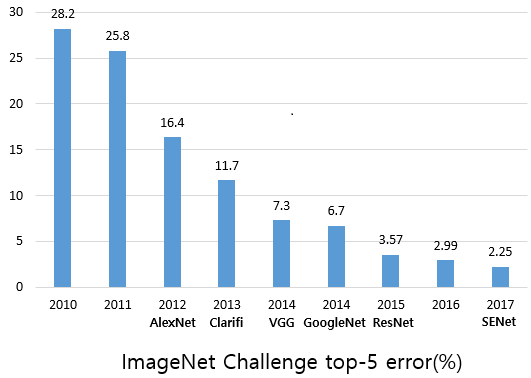

### a. VGG16/19

Oxford 대학의 VGG (Visual Geometry Group)모델은 2012년 Imagenet Challenge를 우승한 alexnet을 개량한 것으로,
network의 깊이가 모델 성능에 미치는 영향을 연구하였습니다.

똑같은 사이즈의 필터를(3x3) 사용하여, padding size 1로
convolution layer를 여러번 쌓으며 layer마다
feature map을 resize 하는것이 아닌,
max pooling으로 resize 시켜 더 복잡하고 효과적인 feature extraction을 가능토록 하였다고 볼 수 있습니다.

2014년 imagenet challenge에서 준우승을 하였지만 간결한 구조로 높은 성능을 보인점에서,
1등이였던 Inception V1 (GoogLenet)보다 더 광범위하게 차용되어,
VGG 이후 대분의 모델들이 이런 컨셉을 차용하여 매우 큰 영향을 주었다고 볼 수 있습니다.

In [7]:
model = vgg16(weights=VGG16_Weights)

In [8]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
%pip install torchinfo
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [10]:
# 모델의 weight값과 shape이 궁금하다면?
for name, param in model.named_parameters():
    print(name, end='\t')
    print(param.shape)

features.0.weight	torch.Size([64, 3, 3, 3])
features.0.bias	torch.Size([64])
features.2.weight	torch.Size([64, 64, 3, 3])
features.2.bias	torch.Size([64])
features.5.weight	torch.Size([128, 64, 3, 3])
features.5.bias	torch.Size([128])
features.7.weight	torch.Size([128, 128, 3, 3])
features.7.bias	torch.Size([128])
features.10.weight	torch.Size([256, 128, 3, 3])
features.10.bias	torch.Size([256])
features.12.weight	torch.Size([256, 256, 3, 3])
features.12.bias	torch.Size([256])
features.14.weight	torch.Size([256, 256, 3, 3])
features.14.bias	torch.Size([256])
features.17.weight	torch.Size([512, 256, 3, 3])
features.17.bias	torch.Size([512])
features.19.weight	torch.Size([512, 512, 3, 3])
features.19.bias	torch.Size([512])
features.21.weight	torch.Size([512, 512, 3, 3])
features.21.bias	torch.Size([512])
features.24.weight	torch.Size([512, 512, 3, 3])
features.24.bias	torch.Size([512])
features.26.weight	torch.Size([512, 512, 3, 3])
features.26.bias	torch.Size([512])
features.28.weight	t

### b. ResNet50/101/152

Microsoft사의 Resnet (Residual Nerual Network)은 모델의 깊이가 깊어 질 수록 발생하는 기울기 소실 문제 등을
Skip Connection 기법과 activation funtion으로 relu를 사용함으로써
VGG의 16,19 layer보다 더 깊은 152, 1001의 layer를 쌓아 성능을 개선하였습니다.


Skip Connection의 원리는 layer connection에 일종의 지름길을 만들어 주어
 역전파의 영향력이 모델의 앞 layer까지 전달 될 수 있도록 함으로써
 convolution layer 각각의 중요도를 평준화 시켰다고 볼 수 있습니다.
이러한 컨셉은 최신의 모델들에서 광범위하게 차용되는 것을 확인 할 수 있습니다.

늘어나는 layer 수에 따라 커지는 모델 복잡도를 최적화하기 위해
max-pooling, hidden fully connected layer, dropout을 사용을 최소화하는 것도 특징입니다.

In [11]:
model = resnet50(weights=ResNet50_Weights)
summary(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s]


Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

### c. MobileNet

MobileNet은 AlexNet 이후 발표된 네트워크들의 경향은 성능을 높이기 위해 깊고 복잡하게 만드는 것이었습니다. 하지만 이런 복잡한 모델은 모바일 환경에서 동작하기 위해서는 연산량, 모델의 크기, 동작시간에 대해 고려되지 않았습니다.

딥러닝 모델을 작게 만들기 위해서 시도되는 방법은 학습된 모델을 압축하는방법, 효율적인 네트워크 구조를 설계하는 방법 등이 있습니다. MobileNet은 2017년 Google에서 발표하였으며, 효율인 구조를 설계하여 경량화를 이뤄낸 네트워크입니다.

모델의 크기와 동작시간을 줄이는 효율적인 네트워크 구성을 위해 MobileNet은 Xception 구조에서 제안된 Depthwise Separable Convolution을 활용합니다. 또 하드웨어의 특성에 맞추기 위해 모델 크기를 조절하기 위한 하이퍼파라미터를 제안했습니다.

참고로 Xcption은 GoogLenet(Inception v1) 모델이 제시한,
한 layer에서 다른 여러 개 kernel을 사용하여 concat하여
layer간의 연결을 최소화하는 컨셉을 extreme하게 조정하고
Resnet의 Skip Connection 기법을 합쳐 더 좋은 성능을 보인 모델입니다.

GoogLenet과 같이 한 종류의 커널이 아닌 여러가지 커널을 사용하면서
channel을 분리하여(Separable Convolution layer)
feature 추출하는 기법을 사용하여 높은 수준의 추상화와 작은 특징도 효율적으로 검출 가능토록 합니다.


In [12]:
model = mobilenet_v3_small(weights=MobileNet_V3_Small_Weights)
summary(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 41.7MB/s]


Layer (type:depth-idx)                             Param #
MobileNetV3                                        --
├─Sequential: 1-1                                  --
│    └─Conv2dNormActivation: 2-1                   --
│    │    └─Conv2d: 3-1                            432
│    │    └─BatchNorm2d: 3-2                       32
│    │    └─Hardswish: 3-3                         --
│    └─InvertedResidual: 2-2                       --
│    │    └─Sequential: 3-4                        744
│    └─InvertedResidual: 2-3                       --
│    │    └─Sequential: 3-5                        3,864
│    └─InvertedResidual: 2-4                       --
│    │    └─Sequential: 3-6                        5,416
│    └─InvertedResidual: 2-5                       --
│    │    └─Sequential: 3-7                        13,736
│    └─InvertedResidual: 2-6                       --
│    │    └─Sequential: 3-8                        57,264
│    └─InvertedResidual: 2-7                       --
│    │ 

### d. EfficientNet

NAS(Neural Architecture Search)란 머신 러닝 설계에 머신 러닝인 AUTOML을 사용하는 연구이며,
1. feature 추출 방법 최적화 (Automated Feature Learning)
2. 구조 최적화 (Architecture Search)
3. 학습률, 배치 사이즈등의 hyperparameter 최적화 (Hyperparameter Optimization)
이 3가지를 기존의 사람이 아닌, machine에게 맡긴다는 내용입니다.


NASNet은 위의 3가지를 image classification에만 집중한 알고리즘이고
기타 SATA 이미지 분류 모델들에 버금가는 성능을 보여줍니다.

모델 설계를 위해 고려할 parameter가 너무 크다보니 500개의 GPU(NVIDIA P100s GPU)로 4일이라는 긴 학습시간이 소요된다는 아쉬운점이 있지만, 강화 학습 기반으로 사람이 설계한 SATA모델들에 버금가는 성능을 보여준다는것 자체로 큰 의미를 가집니다.

EfficientNet 은 이 AutoML을 사용하여,
한정된 자원으로 최대의 효율을 내기 위한 방법으로 model scaling을 시스템적으로 분석한다.
1. network의 depth를 깊게 만드는 것
2. channel width(filter 개수)를 늘리는 것(width가 넓을수록 미세한 정보가 많이 담김)
3. input image의 해상도를 올리는 것(resolution)

EfficientNet은 파라미터 수 별로 다양한 모델 구조를 가지고 있습니다.

In [13]:
model = efficientnet_b3(pretrained=True) #weights=EfficientNet_B3_Weights
summary(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-cf984f9c.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 248MB/s]


Layer (type:depth-idx)                                  Param #
EfficientNet                                            --
├─Sequential: 1-1                                       --
│    └─Conv2dNormActivation: 2-1                        --
│    │    └─Conv2d: 3-1                                 1,080
│    │    └─BatchNorm2d: 3-2                            80
│    │    └─SiLU: 3-3                                   --
│    └─Sequential: 2-2                                  --
│    │    └─MBConv: 3-4                                 2,298
│    │    └─MBConv: 3-5                                 1,206
│    └─Sequential: 2-3                                  --
│    │    └─MBConv: 3-6                                 11,878
│    │    └─MBConv: 3-7                                 18,120
│    │    └─MBConv: 3-8                                 18,120
│    └─Sequential: 2-4                                  --
│    │    └─MBConv: 3-9                                 24,296
│    │    └─MBConv: 3-10  

## 테스트 이미지 파일 업로드

colab 화면의 왼쪽의 파일 경로에 test_images 폴더를 생성 한 후 테스트할 이미지를 업로드 합니다.

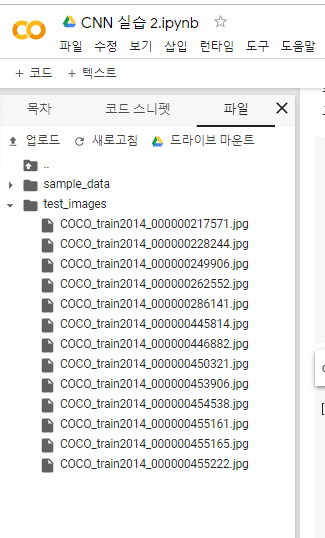

In [15]:
!mkdir test_images # test_images라는 이름의 폴더 생성

In [16]:
# test 이미지 파일의 경로 설정
# test를 위해 mscoco dataset중 일부 사용
import os
test_images = 'test_images/' # 경로 지정
imagenames = []
for file_name in os.listdir(test_images):       # directory 내의 파일들 호출
  if 'JPEG' in file_name:
    imagenames.append(test_images + file_name)
  else:
    pass

In [17]:
#test 이미지 리스트
imagenames

['test_images/n04493381_tub.JPEG',
 'test_images/n03786901_mortar.JPEG',
 'test_images/n02123597_Siamese_cat.JPEG',
 'test_images/n12768682_buckeye.JPEG',
 'test_images/n02092002_Scottish_deerhound.JPEG',
 'test_images/n04209239_shower_curtain.JPEG',
 'test_images/n02077923_sea_lion.JPEG',
 'test_images/n03014705_chest.JPEG',
 'test_images/n13044778_earthstar.JPEG',
 'test_images/n02111129_Leonberg.JPEG',
 'test_images/n07693725_bagel.JPEG',
 'test_images/n03447721_gong.JPEG',
 'test_images/n03924679_photocopier.JPEG',
 'test_images/n02795169_barrel.JPEG',
 'test_images/n02219486_ant.JPEG',
 'test_images/n02107142_Doberman.JPEG',
 'test_images/n12144580_corn.JPEG']

## 모델 지정 (모델 타입, input shape)

In [18]:
# 모델 사전을 구축해 불러 온다.
networks = {
  "VGG19": vgg19,
  "ResNet152": resnet152,
  "MobileNetV3": mobilenet_v3_small,
  "EfficientNetB3": efficientnet_b3,
}

# 모델명을 지정한다.
modelname = 'VGG19'

print("Model 로딩 중")
# imagenet으로 사전 학습된 weights를 불러 온다
network = networks[modelname]
model = network(pretrained=True)

# 각 모델이 사전 학습된 환경에 맞게 input shape와 전처리 함수를 설정해줘야 한다.
# EfficientNetB3의 경우에는 input shape를 (300x300)로,
# 그 외에는 input shape를 (224x224)로 설정 한다.

if modelname in ("EfficientNetB3"):
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

# 모델 구조 확인
summary(model)

Model 로딩 중


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:08<00:00, 68.2MB/s]


Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─Conv2d: 2-17                      590,080
│    └─ReLU: 2-18                        --
│    └─MaxPool2d: 2-19             

## 전처리 및 모델 예측

In [19]:
# 전처리에 사용할 package들을 불러온다
from collections import defaultdict

import cv2      # computer vision 용 library
from torch.utils.data import Dataset, DataLoader
import albumentations as A  # transformations
from albumentations.pytorch.transforms import ToTensorV2

from google.colab.patches import cv2_imshow
import numpy as np

import json

In [20]:
# 내가 가진 데이터셋을 불러올 클래스를 정의 (pytorch의 Dataset 클래스를 상속받는다.)
class CustomDataset(Dataset):
    def __init__(self, img_path_list, transform=None):
        self.img_path_list = img_path_list  # 이미지 경로가 담겨있는 리스트 -> 문자열 크기는 작음
        self.transform = transform          # ex. crop, color jit, 숫자화, 리사이즈 등으로 변형

    # 데이터와 이미지를 반환해줄 __getitem__ 메서드를 정의
    # 계산에 사용하는 data 와 label 두개를 반환해야 한다.
    def __getitem__(self, index):
        # 해당 index의 이미지 경로를 통해
        img_path = self.img_path_list[index]
        # 이미지를 읽어온 뒤,
        image = cv2.imread(img_path)

        # transform이 있으면, 적용
        if self.transform is not None:
            image = self.transform(image=image)['image']

        # 라벨은 test_images/n09288635_geyser.JPEG -> geyser만 가져온다.
        label = '_'.join(img_path.split('_')[2:])[:-5]
        # 'test_images/n02077923_sea_lion.JPEG' -> split('_') -> [test, images/n02077923, sea, lion.JPEG] -> [2:] -> [sea, lion.JPEG] -> '_'.join() -> sea_lion.JPEG -> [:-5] -> sea_lion
        return image, label

    # 데이터 갯수를 반환하는 __len__ 매직메서드 정의
    def __len__(self):
        return len(self.img_path_list)

In [21]:
# 이미지 전처리 시 자주 사용하는 Albumentations 라이브러리 활용 transforme 정의
test_transform = A.Compose([
    A.augmentations.geometric.resize.SmallestMaxSize(224), # 이미지 너비, 높이 중 짧은 쪽의 길이를 224로 맞춤
    A.augmentations.crops.transforms.CenterCrop(224, 224, p=1.0), # 가운데를 기준으로 224,224의 이미지로 자름 (이미지를 변형시키지 않음)
    # A.Resize(*input_image_shape), # 이미지를 resizing
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0), # 정규화
    ToTensorV2() # (C, W, H)로 변경, 설명에는 H, W, C -> C, H, W 로 되어있는데, 이미지는 보통 W, H, C 순으로 되어있으니 C, W, H가 된다.
    ])

In [22]:
# 위의 데이터셋과 데이터로더를 통해 데이터로더 생성
test_dataset = CustomDataset(imagenames, test_transform)    # def __init__(self, img_path_list, transform=None)
test_loader = DataLoader(test_dataset, batch_size = 32,
                          shuffle=False, num_workers=0)

#### 추론

In [24]:
# idx를 label로 변경
labels_to_name = json.load(open('./idx_to_label.json', 'r'))

def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

# 추론 시 가중치가 바뀌는 것을 방지 (이것을 적용하지 않으면 추론때마다 결과값이 달라질 수 있음.)
# 그래도 바뀐다면 model의 dropout이 있는지, 옵션에 training=self.training 옵션이 있는지 확인 (training 속성에 따라 적용, 미적용이 달라진다.)
# dropout -> overfitting 방지
model.eval()
for data, target in test_loader:
    # 모델을 통해 추론
    with torch.no_grad():
        output = model(data)

    # shuffle을 false로 하였고, batch_size내에 이미지가 모두 들어가므로 index로 이미지를 가져온다.
    # 만약, 이미지를 하나만 추론할 경우에는 dataloader를 별도로 정의하지 않고 이미지에 transform을 적용하고 추론하여 결과값을 얻는다.
    # np.argmax()를 통해 추론된 결과에서 가장 큰 값의 index를 가져옴 = pred

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        # 현재 추론한 이미지 show
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]*100))
        print('Top 5 Predictions\n{}'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))

Output hidden; open in https://colab.research.google.com to view.

## Q1. ResNet152, MobileNetV3, EfficientNetB3 으로 model을 변경하여 결과를 비교해보세요.

### A. modelname 변경
### B. model의 input shape, framework를 확인하여 모델에 맞게 설정 필요.

In [25]:
modelname = 'ResNet152'

print("Model 로딩 중")
network = networks[modelname]
model = network(pretrained=True)

if modelname in ("EfficientNetB3"): # effnet
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

model.eval()
for data, target in test_loader:
    with torch.no_grad():
        output = model(data)

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]))
        print('{}\n'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))


Output hidden; open in https://colab.research.google.com to view.

In [26]:
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─Bottleneck: 2-1                   --
│    │    └─Conv2d: 3-1                  4,096
│    │    └─BatchNorm2d: 3-2             128
│    │    └─Conv2d: 3-3                  36,864
│    │    └─BatchNorm2d: 3-4             128
│    │    └─Conv2d: 3-5                  16,384
│    │    └─BatchNorm2d: 3-6             512
│    │    └─ReLU: 3-7                    --
│    │    └─Sequential: 3-8              16,896
│    └─Bottleneck: 2-2                   --
│    │    └─Conv2d: 3-9                  16,384
│    │    └─BatchNorm2d: 3-10            128
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            128
│    │    └─Conv2d: 3-13               

In [27]:
modelname = 'MobileNetV3'

print("Model 로딩 중")
network = networks[modelname]
model = network(pretrained=True)

if modelname in ("EfficientNetB3"): # effnet
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

model.eval()
for data, target in test_loader:
    with torch.no_grad():
        output = model(data)

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]))
        print('{}\n'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))


Output hidden; open in https://colab.research.google.com to view.

In [28]:
summary(model)

Layer (type:depth-idx)                             Param #
MobileNetV3                                        --
├─Sequential: 1-1                                  --
│    └─Conv2dNormActivation: 2-1                   --
│    │    └─Conv2d: 3-1                            432
│    │    └─BatchNorm2d: 3-2                       32
│    │    └─Hardswish: 3-3                         --
│    └─InvertedResidual: 2-2                       --
│    │    └─Sequential: 3-4                        744
│    └─InvertedResidual: 2-3                       --
│    │    └─Sequential: 3-5                        3,864
│    └─InvertedResidual: 2-4                       --
│    │    └─Sequential: 3-6                        5,416
│    └─InvertedResidual: 2-5                       --
│    │    └─Sequential: 3-7                        13,736
│    └─InvertedResidual: 2-6                       --
│    │    └─Sequential: 3-8                        57,264
│    └─InvertedResidual: 2-7                       --
│    │ 

In [29]:
modelname = 'EfficientNetB3'

print("Model 로딩 중")
network = networks[modelname]
model = network(pretrained=True)

if modelname in ("EfficientNetB3"): # effnet
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

model.eval()
for data, target in test_loader:
    with torch.no_grad():
        output = model(data)

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]))
        print('{}\n'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))


Output hidden; open in https://colab.research.google.com to view.

In [30]:
summary(model)

Layer (type:depth-idx)                                  Param #
EfficientNet                                            --
├─Sequential: 1-1                                       --
│    └─Conv2dNormActivation: 2-1                        --
│    │    └─Conv2d: 3-1                                 1,080
│    │    └─BatchNorm2d: 3-2                            80
│    │    └─SiLU: 3-3                                   --
│    └─Sequential: 2-2                                  --
│    │    └─MBConv: 3-4                                 2,298
│    │    └─MBConv: 3-5                                 1,206
│    └─Sequential: 2-3                                  --
│    │    └─MBConv: 3-6                                 11,878
│    │    └─MBConv: 3-7                                 18,120
│    │    └─MBConv: 3-8                                 18,120
│    └─Sequential: 2-4                                  --
│    │    └─MBConv: 3-9                                 24,296
│    │    └─MBConv: 3-10  

## Q2. Densenet201, Vision Transformer 모델을 import 하여 결과를 비교 해보세요.

In [31]:
# 사용할 pretrained model들을 불러온다
from torchvision.models import densenet201
from torchvision.models import vit_b_16

# pretrained model에 적용할 weights를 불러온다
from torchvision.models import DenseNet201_Weights
from torchvision.models import ViT_B_16_Weights


In [32]:
networks = {
  "DenseNet201": densenet201,
  "VITB16": vit_b_16,
}

modelname = 'VITB16'

print("Model 로딩 중")
network = networks[modelname]
model = network(pretrained=True)

if modelname in ("EfficientNetB3"):
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

model.eval()
for data, target in test_loader:
    with torch.no_grad():
        output = model(data)

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]))
        print('{}\n'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))

Output hidden; open in https://colab.research.google.com to view.

In [33]:
summary(model)

Layer (type:depth-idx)                                            Param #
VisionTransformer                                                 768
├─Conv2d: 1-1                                                     590,592
├─Encoder: 1-2                                                    151,296
│    └─Dropout: 2-1                                               --
│    └─Sequential: 2-2                                            --
│    │    └─EncoderBlock: 3-1                                     7,087,872
│    │    └─EncoderBlock: 3-2                                     7,087,872
│    │    └─EncoderBlock: 3-3                                     7,087,872
│    │    └─EncoderBlock: 3-4                                     7,087,872
│    │    └─EncoderBlock: 3-5                                     7,087,872
│    │    └─EncoderBlock: 3-6                                     7,087,872
│    │    └─EncoderBlock: 3-7                                     7,087,872
│    │    └─EncoderBlock: 3-8         

In [34]:
networks = {
  "DenseNet201": densenet201,
  "VITB16": vit_b_16,
}

modelname = 'DenseNet201'

print("Model 로딩 중")
network = networks[modelname]
model = network(pretrained=True)

if modelname in ("EfficientNetB3"):
	input_image_shape = (300, 300)
else:
	input_image_shape = (224, 224)

model.eval()
for data, target in test_loader:
    with torch.no_grad():
        output = model(data)

    for i, pred in enumerate(np.argpartition(output.detach().numpy(), -5, axis=1)[:, -5:]):
        image = cv2.imread(imagenames[i])
        cv2_imshow(image)

        print('Target: {} / Predict: {} - {:.2f}%'.format(target[i], labels_to_name[str(pred[0])], softmax(output.detach().numpy()[i])[pred[0]]))
        print('{}\n'.format('\n'.join([' '.join((str(i), labels_to_name[str(p)])) for i, p in enumerate(pred[1:], start=2)])))

In [35]:
summary(model)

Layer (type:depth-idx)                   Param #
DenseNet                                 --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       9,408
│    └─BatchNorm2d: 2-2                  128
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
│    └─_DenseBlock: 2-5                  --
│    │    └─_DenseLayer: 3-1             45,440
│    │    └─_DenseLayer: 3-2             49,600
│    │    └─_DenseLayer: 3-3             53,760
│    │    └─_DenseLayer: 3-4             57,920
│    │    └─_DenseLayer: 3-5             62,080
│    │    └─_DenseLayer: 3-6             66,240
│    └─_Transition: 2-6                  --
│    │    └─BatchNorm2d: 3-7             512
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  32,768
│    │    └─AvgPool2d: 3-10              --
│    └─_DenseBlock: 2-7                  --
│    │    └─_DenseLayer: 3-11            53,760
│    │    └─_DenseLayer: 3-12     